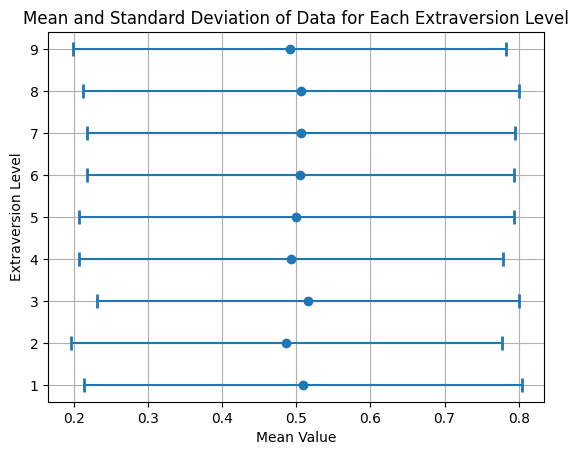

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 例として、ランダムなデータを生成します。
# 実際のデータを使用する場合は、この部分を置き換えてください。
data = np.random.rand(9, 500)

# 各レベルの平均値と標準偏差を計算します。
means = np.mean(data, axis=1)
std_devs = np.std(data, axis=1)

# Extraversionのレベルを定義します。
ext_levels = np.arange(1, 10)

# 縦軸と横軸を逆にしたグラフを作成します。
plt.errorbar(means, ext_levels, xerr=std_devs, fmt='o', capsize=5, capthick=2)
plt.ylabel('Extraversion Level')
plt.xlabel('Mean Value')
plt.title('Mean and Standard Deviation of Data for Each Extraversion Level')
plt.yticks(ext_levels)
plt.grid(True)

# グラフを表示します。
plt.show()


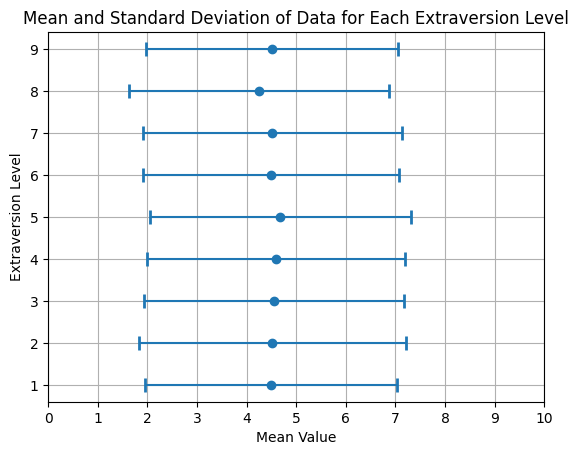

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 例として、ランダムなデータを生成します。
# 実際のデータを使用する場合は、この部分を置き換えてください。
data = np.random.rand(9, 500) * 9  # 0-9の範囲にデータをスケーリング

# 各レベルの平均値と標準偏差を計算します。
means = np.mean(data, axis=1)
std_devs = np.std(data, axis=1)

# Extraversionのレベルを定義します。
ext_levels = np.arange(1, 10)

# 縦軸と横軸を逆にしたグラフを作成し、mean valueの軸を0-10の値に変更します。
plt.errorbar(means, ext_levels, xerr=std_devs, fmt='o', capsize=5, capthick=2)
plt.ylabel('Extraversion Level')
plt.xlabel('Mean Value')
plt.title('Mean and Standard Deviation of Data for Each Extraversion Level')
plt.yticks(ext_levels)
plt.xticks(np.arange(0, 11, 1))  # 0から10までの目盛りを設定
plt.xlim(0, 10)  # x軸の範囲を0から10に設定
plt.grid(True)

# グラフを表示します。
plt.show()


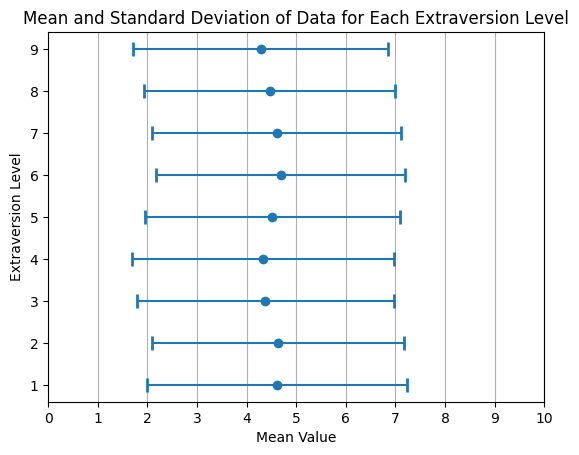

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas 

# # 実際のデータを使用する場合は、この部分を置き換えてください。
# data = np.random.rand(9, 500) * 9  # 0-9の範囲にデータをスケーリング

# データの取り出し
data = []
for i in range(1,11):
    df = pd.read_csv('prediction_result{}.csv'.format(i))
    data.append(df)

domain_p = ['EXT_p', 'NEU_p', 'AGR_p', 'CON_p', 'OPN_p']
domain   = ['EXT', 'NEU', 'AGR', 'CON', 'OPN']



# 各レベルの平均値と標準偏差を計算します。
means = np.mean(data, axis=1)
std_devs = np.std(data, axis=1)

# Extraversionのレベルを定義します。
ext_levels = np.arange(1, 10)

# 縦軸と横軸を逆にしたグラフを作成し、mean valueの軸を0-10の値に変更します。
plt.errorbar(means, ext_levels, xerr=std_devs, fmt='o', capsize=5, capthick=2)
plt.ylabel('Extraversion Level')
plt.xlabel('Mean Value')
plt.title('Mean and Standard Deviation of Data for Each Extraversion Level')
plt.yticks(ext_levels)
plt.xticks(np.arange(0, 11, 1))  # 0から10までの目盛りを設定
plt.xlim(0, 10)  # x軸の範囲を0から10に設定
plt.grid(True, axis='x')  # 縦のグリッドのみ表示

# グラフを表示します。
plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

# データの読み込み
file_pattern = 'prediction_result*.csv'
csv_files = glob.glob(file_pattern)

dataframes = []

for file in csv_files:
    df = pd.read_csv(file)
    dataframes.append(df)

df = pd.concat(dataframes, ignore_index=True)
df.rename(columns={'OPN_p': 'OPE_p'}, inplace=True)


domains   = ['EXT', 'NEU', 'AGR', 'CON', 'OPE']
domains_p = ['EXT_p', 'NEU_p', 'AGR_p', 'CON_p', 'OPE_p']

# データフレームの特定の列を数字型に変換
for domain in domains_p:
    df[domain] = pd.to_numeric(df[domain])
df['id'] = pd.to_numeric(df['id'])
df['level'] = pd.to_numeric(df['level'])
df['persona_id'] = pd.to_numeric(df['persona_id'])

# 標準偏差と平均値を求める
result = {}
for domain in domains:
    # ドメイン毎に結果を保持
    result[domain] = {"means": [], "stds": []}
    domain_df = df[df['domain'] == domain]
    for level in range(1,10):
        domain_level_df = domain_df[domain_df['level'] == level]
        mean = np.mean(domain_level_df["{}_p".format(domain)])
        std  = np.std(domain_level_df["{}_p".format(domain)])
        result[domain]["means"].append(mean)
        result[domain]["stds"].append(std)
print(result)


# 結果の表示
domain = "EXT"
# plt.errorbar(result[domain][0]


{'EXT': {'means': [0.30470600000000003, 0.307586, 0.311454, 0.358788, 0.350654, 0.6703879999999999, 0.6877040000000001, 0.7020879999999999, 0.712364], 'stds': [0.08955197130158554, 0.08053738637427961, 0.08746736467963351, 0.0908822262931537, 0.10679304417423449, 0.10830201039685275, 0.10476476690185495, 0.09770279553830585, 0.10156859506756999]}, 'NEU': {'means': [0.25854600000000005, 0.25450799999999996, 0.24547199999999997, 0.23957, 0.233302, 0.32831999999999995, 0.378098, 0.40607, 0.43476], 'stds': [0.06982847473631369, 0.07380009441728377, 0.07199111900783318, 0.06565276155654079, 0.07610386846934918, 0.09203650145458595, 0.09591162805416245, 0.103501290330121, 0.10460559449666161]}, 'AGR': {'means': [0.248568, 0.23656, 0.23649, 0.23366599999999998, 0.390398, 0.47614, 0.47263599999999995, 0.486116, 0.490186], 'stds': [0.08996215524319101, 0.09350164918331655, 0.08626729333878512, 0.08525197032327171, 0.12493959979125913, 0.12154597648626629, 0.12055352132559215, 0.1191909499248999

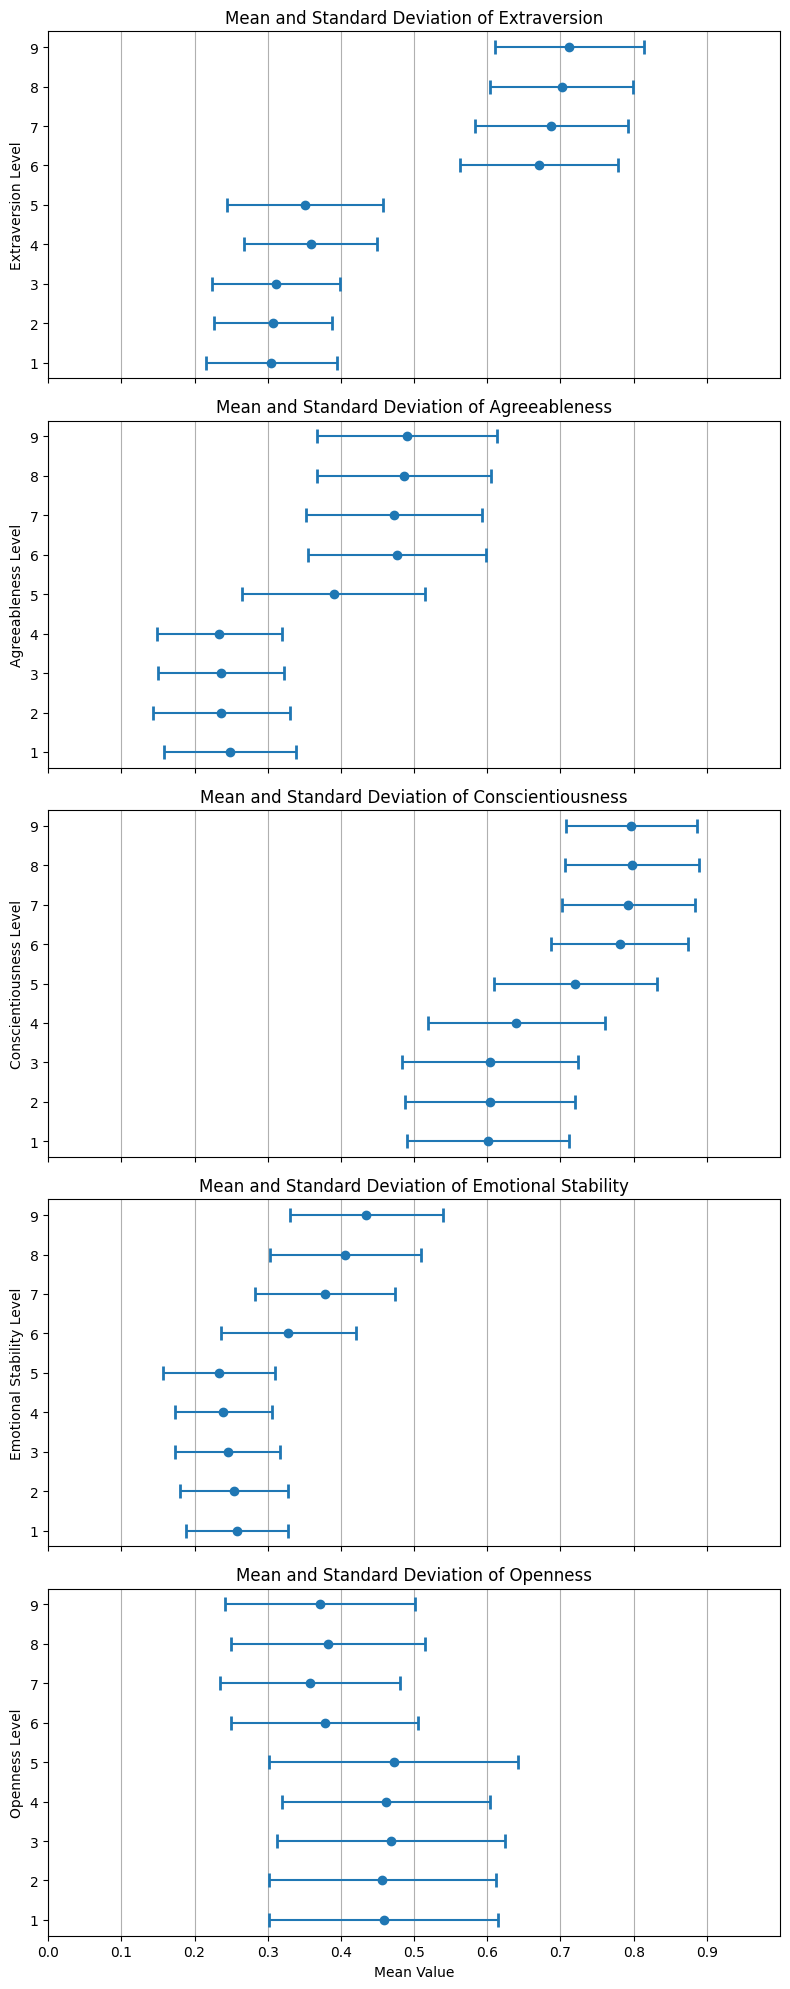

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# # 例として、ランダムなデータを生成します。
# # 実際のデータを使用する場合は、この部分を置き換えてください。
# data_ext = np.random.rand(9, 500) * 9  # Extraversionのデータ
# data_agr = np.random.rand(9, 500) * 9  # Agreeablenessのデータ
# data_con = np.random.rand(9, 500) * 9  # Conscientiousnessのデータ
# data_emo = np.random.rand(9, 500) * 9  # Emotional Stabilityのデータ
# data_ope = np.random.rand(9, 500) * 9  # Opennessのデータ

# # 各レベルの平均値と標準偏差を計算します。
# means_ext = np.mean(data_ext, axis=1)
# std_devs_ext = np.std(data_ext, axis=1)

# means_agr = np.mean(data_agr, axis=1)
# std_devs_agr = np.std(data_agr, axis=1)

# means_con = np.mean(data_con, axis=1)
# std_devs_con = np.std(data_con, axis=1)

# means_emo = np.mean(data_emo, axis=1)
# std_devs_emo = np.std(data_emo, axis=1)

# means_ope = np.mean(data_ope, axis=1)
# std_devs_ope = np.std(data_ope, axis=1)

# Extraversionのレベルを定義します。
levels = np.arange(1, 10)

# サブプロットを作成
fig, axs = plt.subplots(5, 1, figsize=(8, 20), sharex=True)

# Extraversionのプロット
axs[0].errorbar(result["EXT"]["means"], levels, xerr=result["EXT"]["stds"], fmt='o', capsize=5, capthick=2)
axs[0].set_ylabel('Extraversion Level')
axs[0].set_title('Mean and Standard Deviation of Extraversion')

# Agreeablenessのプロット
axs[1].errorbar(result["AGR"]["means"], levels, xerr=result["AGR"]["stds"], fmt='o', capsize=5, capthick=2)
axs[1].set_ylabel('Agreeableness Level')
axs[1].set_title('Mean and Standard Deviation of Agreeableness')

# Conscientiousnessのプロット
axs[2].errorbar(result["CON"]["means"], levels, xerr=result["CON"]["stds"], fmt='o', capsize=5, capthick=2)
axs[2].set_ylabel('Conscientiousness Level')
axs[2].set_title('Mean and Standard Deviation of Conscientiousness')

# Neuroticism のプロット
axs[3].errorbar(result["NEU"]["means"], levels, xerr=result["NEU"]["stds"], fmt='o', capsize=5, capthick=2)
axs[3].set_ylabel('Emotional Stability Level')
axs[3].set_title('Mean and Standard Deviation of Emotional Stability')

# Opennessのプロット
axs[4].errorbar(result["OPE"]["means"], levels, xerr=result["OPE"]["stds"], fmt='o', capsize=5, capthick=2)
axs[4].set_ylabel('Openness Level')
axs[4].set_title('Mean and Standard Deviation of Openness')

axs[4].set_xlabel('Mean Value')

# 共通のx軸の設定
for ax in axs:
    ax.set_xlim(0, 1)
    ax.set_xticks(np.arange(0, 1, 0.1))
    ax.grid(True, axis='x')
    ax.set_yticks(levels)

plt.tight_layout()
plt.show()
